In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv')
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [31]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [32]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [33]:
data.shape

(16468, 13)

#### Handling null values in dataset

In [34]:
data.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [35]:
nrow,ncol=np.where(data.isnull())

In [36]:
len(data.iloc[nrow])

194363

In [37]:
len(np.unique(nrow))

14951

In [20]:
df=data.drop(nrow)

In [21]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [28]:
df.shape

(1517, 12)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 13 columns):
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: float64(10), object(3)
memory usage: 165.9+ KB


In [23]:
df.nunique()

Date             104
AveragePrice     113
Total Volume    1517
4046            1517
4225            1517
4770            1516
Total Bags      1517
Small Bags      1517
Large Bags      1377
XLarge Bags      711
type               1
year               2
region            51
dtype: int64

Dropping column 'type', it has only single value

In [24]:
df.drop(columns=['type'],inplace=True)

In [25]:
df.nunique()[df.dtypes==object]

Date      104
region     51
dtype: int64

In [27]:
df.region

0          Albany
1          Albany
2          Albany
3          Albany
4          Albany
          ...    
1512    Charlotte
1513    Charlotte
1514    Charlotte
1515    Charlotte
1516    Charlotte
Name: region, Length: 1517, dtype: object

In [38]:
# Changing the date column into actual date format
df.Date=pd.to_datetime(df.Date)

In [39]:
# Splitting time stamp foramt data to day, month and year

df['day']=df.Date.dt.day
df['month']=df.Date.dt.month
df['year']=df.Date.dt.year

In [40]:
df[['day','month','year']].nunique()

day      31
month    12
year      2
dtype: int64

In [41]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany,27,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany,20,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany,13,12
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany,29,11


In [43]:
df.drop(columns=['Date'],inplace=True)

In [44]:
# Encoding region 

from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [45]:
df.region=lb.fit_transform(df.region)

In [50]:
df.shape

(1517, 13)

In [46]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year              int64
region            int32
day               int64
month             int64
dtype: object

In [47]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440,15.253790,6.362558
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398,8.965902,3.472146
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000,7.000000,3.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000,15.000000,6.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000,22.000000,9.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000,31.000000,12.000000


#### Data Visualization

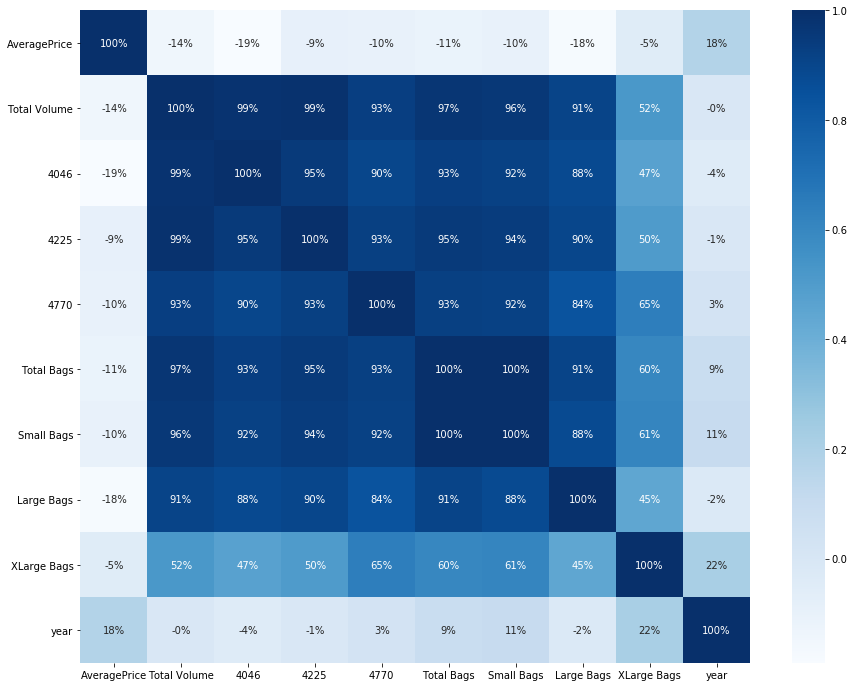

In [49]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),fmt='.0%',annot=True,cmap='Blues')

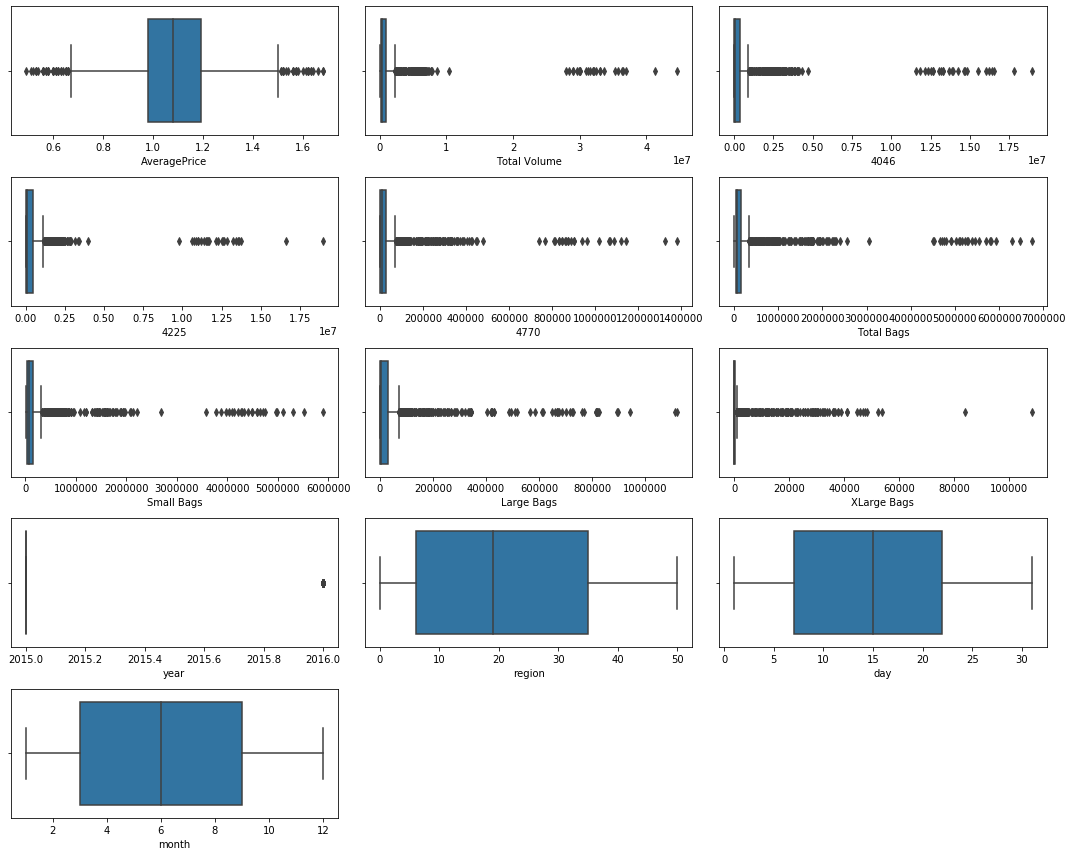

In [52]:
plt.figure(figsize=(15,12))

for n,col in enumerate(df.columns):
    plt.subplot(5,3,n+1)
    sns.boxplot(df[col])
    plt.tight_layout()

- There are outliers present in some columns

#### Handling Outliers

In [54]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z

array([[1.35048079, 0.34696593, 0.33149016, ..., 1.3143384 , 1.31052998,
        1.62415427],
       [1.45639674, 0.34907791, 0.33167633, ..., 1.3143384 , 0.52953678,
        1.62415427],
       [0.76783831, 0.33478463, 0.33161448, ..., 1.3143384 , 0.25145642,
        1.62415427],
       ...,
       [2.14485045, 0.32120275, 0.30820887, ..., 0.88028586, 0.58616779,
        1.25685839],
       [2.09189247, 0.31878364, 0.30423037, ..., 0.88028586, 1.08738906,
        0.75985047],
       [1.88006056, 0.3201721 , 0.30987728, ..., 0.88028586, 0.30639586,
        0.75985047]])

In [55]:
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [56]:
df_new=df[(z<3).all(axis=1)]

In [57]:
df_new.shape

(1436, 13)

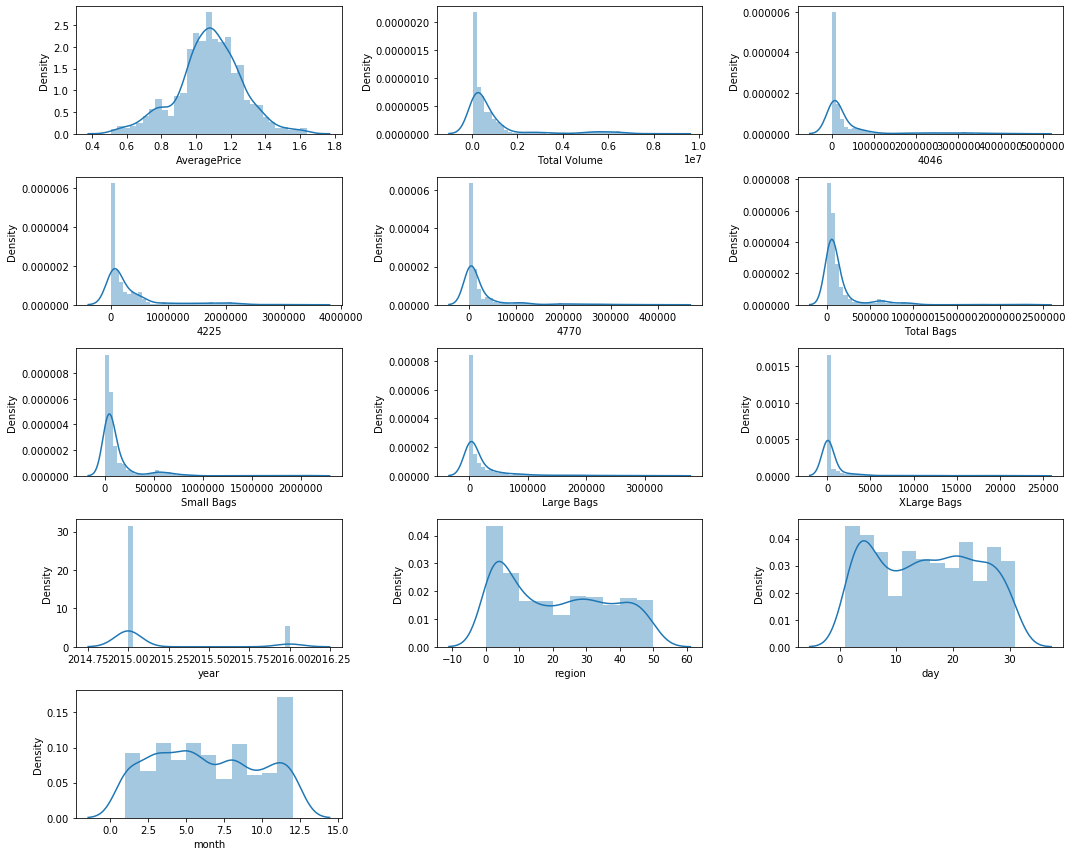

In [58]:
plt.figure(figsize=(15,12))

for n,col in enumerate(df.columns):
    plt.subplot(5,3,n+1)
    sns.distplot(df_new[col])
    plt.tight_layout()

- Some columns are skewed

In [59]:
# Treating skewness via square root method

for ind in df_new.skew().index:
    if df_new.skew().loc[ind]>0.5:
        df_new[ind]=np.cbrt(df_new[ind])
        
    if df_new.skew().loc[ind]<0.5:
        df_new[ind]=np.cbrt(df_new[ind])

#### Splitting data into input and output

In [60]:
xdata=df_new.drop(columns=['AveragePrice'])
xdata.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,12.63063,0.0,3.000000,2.289428
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,12.63063,0.0,2.714418,2.289428
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,12.63063,0.0,2.351335,2.289428
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,12.63063,0.0,2.289428,1.817121
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,12.63063,0.0,3.072317,2.223980


scaling xdata

In [61]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [63]:
xdata=pd.DataFrame(std.fit_transform(xdata),columns=xdata.columns)
xdata.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,day,month
0,-1.061388,-1.149136,-0.620765,-1.165526,-1.253098,-1.173614,-0.973673,-0.629534,-0.41387,-2.588839,1.111104,1.335243
1,-1.116298,-1.187979,-0.702076,-1.149832,-1.222094,-1.141157,-0.969220,-0.629534,-0.41387,-2.588839,0.624201,1.335243
2,-0.819293,-1.173796,-0.289925,-1.071729,-1.275361,-1.197484,-0.963482,-0.629534,-0.41387,-2.588839,0.005164,1.335243
3,-0.984771,-1.140490,-0.497166,-1.130661,-1.382706,-1.312477,-0.935562,-0.629534,-0.41387,-2.588839,-0.100383,0.116021
4,-1.140621,-1.158329,-0.709214,-1.126708,-1.363837,-1.295832,-0.888782,-0.629534,-0.41387,-2.588839,1.234400,1.166293


In [65]:
ydata=df_new.AveragePrice
ydata.head()

0    1.099724
1    1.105209
2    0.976100
3    1.025986
4    1.085767
Name: AveragePrice, dtype: float64

#### Train Test Split

In [70]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression

In [71]:
xtrain,xtest,ytrain,ytest=train_test_split(xdata,ydata,test_size=.3,random_state=42)

In [72]:
lmodel=LinearRegression()

In [73]:
lmodel.fit(xtrain,ytrain)
pred=lmodel.predict(xtest)
r2_score(ytest,pred)*100

43.71791987159958

In [74]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [75]:
limodels=[LinearRegression(),SVR(),KNeighborsRegressor(),DecisionTreeRegressor(),RandomForestRegressor(),XGBRFRegressor(),ExtraTreesRegressor()]
linames=["Linear","SVR","KNN","DecissionTree","Randomforest","XGB","ExtraTreesRegressor"]

In [76]:
def compilor(limodels):
    scores=[]
    mae=[]
    mse=[]
    for i in limodels:
        i.fit(xtrain,ytrain)
        scores.append(i.score(xtest,ytest))

        mae.append(mean_absolute_error(ytest,i.predict(xtest)))
        mse.append(mean_squared_error(ytest,i.predict(xtest)))
    return scores,mse,mae

In [77]:
accuracy,mse,mae=compilor(limodels)

In [78]:
for i in range(len(accuracy)):
    print("accuracy of ",linames[i], "is ",accuracy[i],"  m a e= ",mae[i]," m s e=  ",mse[i])
print("\nbest model for the problem is :", linames[np.argmax(accuracy)])

accuracy of  Linear is  0.43717919871599575   m a e=  0.03434014646999464  m s e=   0.0020722688478056576
accuracy of  SVR is  0.4346309651220258   m a e=  0.036532235209258995  m s e=   0.0020816512748262454
accuracy of  KNN is  0.7799407860050424   m a e=  0.022156577181055726  m s e=   0.0008102434252500859
accuracy of  DecissionTree is  0.679847043200073   m a e=  0.02428186417415399  m s e=   0.0011787819451516334
accuracy of  Randomforest is  0.846796097688343   m a e=  0.018048728216919076  m s e=   0.0005640866034063035
accuracy of  XGB is  0.7505065228287735   m a e=  0.02330943509127881  m s e=   0.0009186184293351183
accuracy of  ExtraTreesRegressor is  0.8881821446165346   m a e=  0.015323655097742717  m s e=   0.000411705924533993

best model for the problem is : ExtraTreesRegressor


In [79]:
xmodel=ExtraTreesRegressor()

In [81]:
xmodel.fit(xtrain,ytrain)
pred=xmodel.predict(xtest)
r2_score(ytest,pred)*100

88.70938242694419